In [2]:
from glob import glob
from script_converter import get_transformation_matrix
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pydicom

import numpy as np

from rt_utils.image_helper import apply_transformation_to_3d_points

In [3]:
mat = get_transformation_matrix('example/Prostatex-0000/t2_tse_tra/')

In [30]:
dcm = pydicom.dcmread('example/Prostatex-0000/t2_tse_tra/IM-0001-0001.dcm')
img1 = dcm.pixel_array
h, w = dcm.pixel_array.shape

## Convert the pixels of the first slice into patient coordinates

In [37]:
ys, xs = np.where(np.ones((h, w)))

coords = np.concatenate((ys.reshape(-1, 1), xs.reshape(-1, 1)), axis=1)

extended_coords0 = np.concatenate((coords, np.ones((h*w, 1))*0), axis=1)
extended_coords1 = np.concatenate((coords, np.ones((h*w, 1))*1), axis=1)
extended_coords2 = np.concatenate((coords, np.ones((h*w, 1))*2), axis=1)

In [38]:
patient_coords0 = apply_transformation_to_3d_points(extended_coords0, mat)
patient_coords1 = apply_transformation_to_3d_points(extended_coords1, mat)
patient_coords2 = apply_transformation_to_3d_points(extended_coords2, mat)

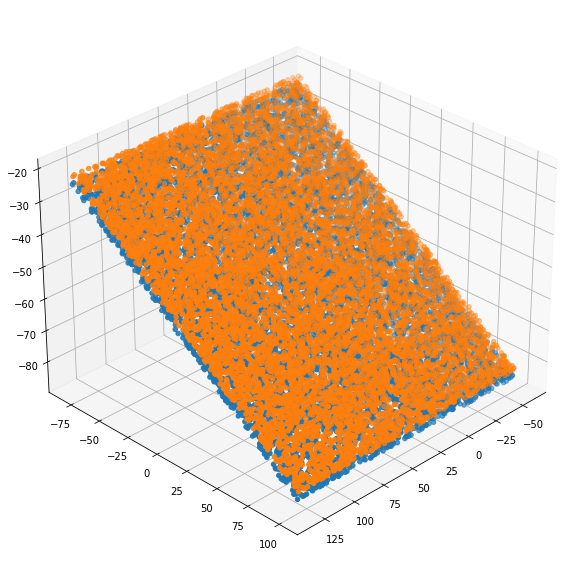

In [39]:
# randomly select some points visualize

indice = np.random.choice(len(ys), 10000)

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(projection='3d')


ax.scatter(patient_coords0[indice, 0], patient_coords0[indice, 1], patient_coords0[indice, 2], color='tab:blue')
ax.scatter(patient_coords1[indice, 0], patient_coords1[indice, 1], patient_coords1[indice, 2], color='tab:orange')
# ax.scatter(patient_coords2[indice, 0], patient_coords2[indice, 1], patient_coords2[indice, 2], color='tab:green')
ax.view_init(elev=30, azim=45)

In [14]:
cmap = matplotlib.cm.get_cmap('Greys')

In [ ]:
indice = np.random.choice(len(ys), 100000)

img1 = ((img1/img1.max()) * 255).transpose().flatten()

colors = img1[indice]

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(projection='3d')


ax.scatter(patient_coords0[indice, 0], patient_coords0[indice, 1], patient_coords0[indice, 2], color=colors)
# ax.scatter(patient_coords1[indice, 0], patient_coords1[indice, 1], patient_coords1[indice, 2], color='tab:orange')
# ax.scatter(patient_coords2[indice, 0], patient_coords2[indice, 1], patient_coords2[indice, 2], color='tab:green')
ax.view_init(elev=30, azim=45)

In [61]:
img1[indice].mean()

71.92084212435235

In [51]:
ys

array([  0,   0,   0, ..., 383, 383, 383])

In [53]:
xs

array([  0,   1,   2, ..., 381, 382, 383])

In [54]:
384*384

147456